In [34]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# <center>Machine Learning Report</center>
### <center>Donato Meoli</center>

<center>Machine Learning course 654AA</center>
<center>Academic year: 2019/2020</center>

<center>Type of project: A with Computational Mathematics</center>

## Abstract

The aim of this report is to show the results over the *Monk's* classification problem and the *Grid Search* results over **ML-CUP19** regression problem. The latter refers to an academic competition within the Machine Learning course for which a **MEE** of **0.75** was achieved using a **Support Vector Regression** with a **Laplacian kernel**.

## Introduction

This work, in all its parts, was motivated by the possibility of being able to solve the optimization problem deriving from the mathematical formulation of the leraning models through a wide range of optimization algorithms object of study and developed for the *Computational Mathematics* course.

## Contents

This project, for what about the *ml* module, is a sklearn compatible custom reimplementation of *Support Vector Machines* and *Deep Neural Networks*, both with some of the most successful features according to the state of art.

## Experiments

### Monk's Problem

In this first section we are going to show firstly how the implementation of both, *Support Vector Machines* and *Neural Networks*, works correctly on Monk’s problem, used as a benchmark for the latter experiments.

#### Support Vector Classifier

In case of *Support Vector Classifier* we are going to use an implementation that exploits the *Wolfe dual* formulation of the latter also to show the kernel trick usage. For what about the optimizer we can choose one method of those available: *SMO Classifier*, *Projected Gradient*, *Active Set*, *Interior Point* or *Frank Wolfe* method.

Alternatively, by specifying an unconstrained one, the *Wolfe dual* constraints will be relaxed into a *Lagrangian bi-dual* formulation.

In [35]:
import numpy as np

from optiml.ml.svm import DualSVC
from optiml.ml.svm.kernels import PolyKernel

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

##### Monk #1

In [49]:
from optiml.opti.constrained.bcqp import ProjectedGradient

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
y_train, y_test = y[:124], y[124:]
    
svc = DualSVC(kernel=PolyKernel(degree=3, gamma='scale'), 
              optimizer=ProjectedGradient, verbose=False)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       216
         1.0       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



##### Monk #2

In [50]:
from optiml.opti.constrained.bcqp import InteriorPoint

X, y = fetch_openml('monks-problems-2', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:169,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[169:,:])
y_train, y_test = y[:169], y[169:]

svc = DualSVC(kernel=PolyKernel(degree=2, gamma='scale'), C=1000, 
              optimizer=InteriorPoint, verbose=False)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       290
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



##### Monk #3

In [51]:
from optiml.opti.constrained.bcqp import ActiveSet

X, y = fetch_openml('monks-problems-3', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:122,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[122:,:])
y_train, y_test = y[:122], y[122:]

svc = DualSVC(kernel=PolyKernel(degree=4, gamma='auto'), C=100, 
              optimizer=ActiveSet, verbose=False)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       204
         1.0       1.00      0.95      0.97       228

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



#### Neural Network Classifier

In case of *Neural Network Classifier* we are going to use different optimizers, both *stochastic* and *line search* methods, with different loss functions.

In [52]:
import numpy as np

from optiml.ml.neural_network import NeuralNetworkClassifier
from optiml.ml.neural_network.layers import FullyConnected

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

##### Monk #1

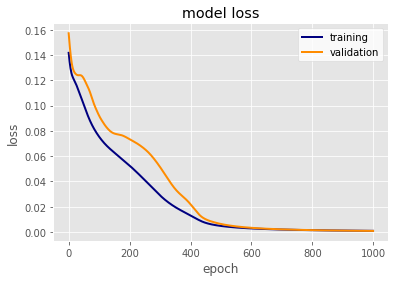

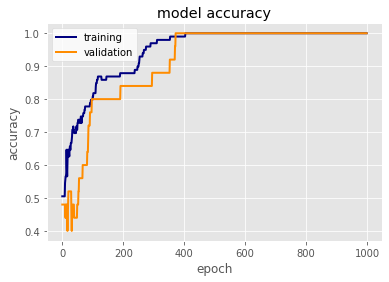

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       216
         1.0       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



In [55]:
from optiml.ml.neural_network.activations import sigmoid
from optiml.ml.neural_network.losses import mean_squared_error
from optiml.ml.utils import plot_model_loss, plot_model_accuracy
from optiml.opti.unconstrained.stochastic import Adam

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
y_train, y_test = y[:124], y[124:]

net = NeuralNetworkClassifier((FullyConnected(17, 5, sigmoid),
                               FullyConnected(5, 1, sigmoid)),
                              loss=mean_squared_error, optimizer=Adam, 
                              learning_rate_init=0.01, early_stopping=False, 
                              validation_split=0.2, max_iter=1000, verbose=False)
net.fit(X_train, y_train)
plot_model_loss(net.train_loss_history, net.val_loss_history)
plot_model_accuracy(net.train_score_history, net.val_score_history)
print(classification_report(y_test, net.predict(X_test)))

##### Monk #2

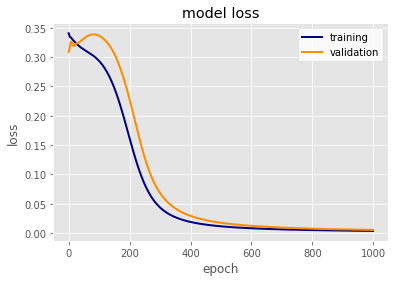

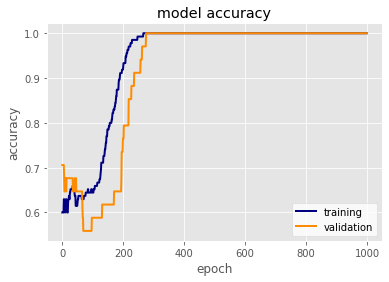

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       290
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



In [56]:
from optiml.ml.neural_network.activations import sigmoid, softmax
from optiml.ml.neural_network.losses import sparse_categorical_cross_entropy

from optiml.opti.unconstrained.stochastic import StochasticGradientDescent

X, y = fetch_openml('monks-problems-2', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:169,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[169:,:])
y_train, y_test = y[:169], y[169:]

net = NeuralNetworkClassifier((FullyConnected(17, 5, sigmoid),
                               FullyConnected(5, 2, softmax)),
                              loss=sparse_categorical_cross_entropy, 
                              optimizer=StochasticGradientDescent, 
                              learning_rate_init=0.1, early_stopping=False, 
                              momentum_type='nesterov', momentum=0.9, 
                              validation_split=0.2,max_iter=1000, verbose=False)
net.fit(X_train, y_train)
plot_model_loss(net.train_loss_history, net.val_loss_history)
plot_model_accuracy(net.train_score_history, net.val_score_history)
print(classification_report(y_test, net.predict(X_test)))

##### Monk #3

In [57]:
from optiml.ml.neural_network.activations import sigmoid, softmax
from optiml.ml.neural_network.losses import mean_squared_error
from optiml.ml.neural_network.regularizers import L2

from optiml.opti.unconstrained.line_search import BFGS

from optiml.opti.unconstrained.stochastic import Adam

X, y = fetch_openml('monks-problems-3', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:122,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[122:,:])
y_train, y_test = y[:122], y[122:]

net = NeuralNetworkClassifier((FullyConnected(17, 10, sigmoid, coef_reg=L2(0.1), inter_reg=L2(0.1)),
                               FullyConnected(10, 1, sigmoid, coef_reg=L2(0.1), inter_reg=L2(0.1))),
                              loss=mean_squared_error, optimizer=BFGS, max_iter=500, verbose=False)
net.fit(X_train, y_train)
print(classification_report(y_test, net.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       204
         1.0       1.00      0.95      0.97       228

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



### ML-CUP19

In this second section of the report we are going to show how to perform the grid search over ML-CUP19 to find the hyperparameters which best generalize the model on the unseen data.

In [26]:
import numpy as np

def load_ml_cup():
    ml_cup = np.delete(np.genfromtxt(module_path + '/optiml/ml/data/ML-CUP19/ML-CUP19-TR.csv', 
                                     delimiter=','), obj=0, axis=1)
    return ml_cup[:, :-2], ml_cup[:, -2:]

def load_ml_cup_blind():
    return np.delete(np.genfromtxt(module_path + '/optiml/ml/data/ML-CUP19/ML-CUP19-TS.csv', 
                                   delimiter=','), obj=0, axis=1)

In [27]:
def mean_euclidean_error(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    return np.mean(np.linalg.norm(y_pred - y_true, axis=1))

The hyperparameters which needs to be tuned are the kernel, the $\epsilon$-insensitive value, the regularization term $C$ and $\gamma$ which define how far the influence of a single training example reaches.

Defining the range of values that are typically chosen to perform an exhaustive grid-search:

In [4]:
epsilon_range = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
gamma_range = [0.0001, 0.001, 0.01, 0.1, 1, 'auto', 'scale']
C_range = [0.1, 1, 10, 100, 1000]

In [22]:
from optiml.ml.svm import DualSVR
from optiml.ml.svm.kernels import gaussian, laplacian

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

X, y = load_ml_cup()

tuned_parameters = [{'estimator__kernel': [gaussian],
                    'estimator__epsilon': epsilon_range,
                    'estimator__gamma': gamma_range,
                    'estimator__C': C_range},
                    {'estimator__kernel': [laplacian],
                     'estimator__epsilon': epsilon_range,
                     'estimator__gamma': ['auto'],
                     'estimator__C': C_range}]

neg_mean_euclidean_error = make_scorer(mean_euclidean_error, greater_is_better=False)

grid = GridSearchCV(MultiOutputRegressor(DualSVR()),
                    param_grid=tuned_parameters,
                    scoring=neg_mean_euclidean_error,
                    cv=5,  # 5 fold cross validation
                    n_jobs=-1,  # use all processors
                    refit=True,  # refit the best model on the full dataset
                    return_train_score=True,
                    verbose=True).fit(X, y)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:  9.8min finished


The winner with the best 40 estimators are:

In [63]:
import pandas as pd

df = pd.DataFrame(grid.cv_results_)[['param_estimator__kernel', 'param_estimator__epsilon', 
                                     'param_estimator__C', 'param_estimator__gamma', 
                                     'mean_train_score', 'mean_test_score', 
                                     'rank_test_score']].sort_values(by='rank_test_score')
df.mean_train_score *= -1
df.mean_test_score *= -1

def highlight_equal(s, value, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] == value
    return ['background-color: lightyellow' if is_max.any() else '' for v in is_max]

df.head(40).style.apply(highlight_equal, value=1, column=['rank_test_score'], axis=1).hide_index()

param_estimator__kernel,param_estimator__epsilon,param_estimator__C,param_estimator__gamma,mean_train_score,mean_test_score,rank_test_score
laplacian,0.001000,100,auto,0.007619,0.748951,1
laplacian,0.010000,100,auto,0.017582,0.749141,2
laplacian,0.001000,1000,auto,0.004522,0.751427,3
laplacian,0.010000,1000,auto,0.015925,0.751506,4
laplacian,0.100000,100,auto,0.133220,0.774410,5
laplacian,0.100000,1000,auto,0.132280,0.776341,6
laplacian,0.200000,100,auto,0.254226,0.811179,7
laplacian,0.200000,1000,auto,0.253615,0.812412,8
laplacian,0.010000,10,auto,0.262517,0.815972,9
laplacian,0.001000,10,auto,0.256716,0.816045,10


Plot validation curve to visualize the performance metric over a range of values for some hyperparameters:

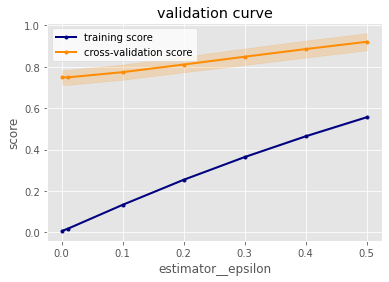

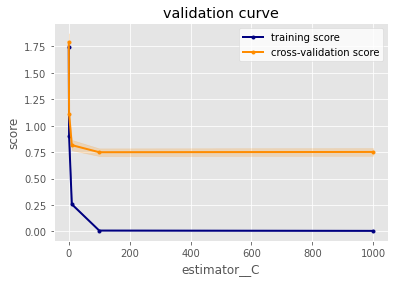

In [28]:
from optiml.ml.utils import plot_validation_curve

mean_euclidean_error = make_scorer(mean_euclidean_error)

plot_validation_curve(grid.best_estimator_, X, y, 'estimator__epsilon', epsilon_range, mean_euclidean_error)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__C', C_range, mean_euclidean_error)

Plot learning curve to visualize the effect of the number of observations on the performance metric:

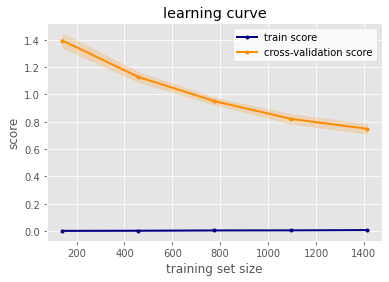

In [29]:
from optiml.ml.utils import plot_validation_curve, plot_learning_curve

plot_learning_curve(grid.best_estimator_, X, y, mean_euclidean_error)

And now, finally, save the predictions over blind test set:

In [112]:
np.savetxt(module_path + '/optiml/ml/data/ML-CUP19/dmeoli_ML-CUP19-TS.csv', 
           grid.predict(load_ml_cup_blind()), delimiter=',')

The predicted results with the best estimator found trough the previously performed model selection are available in the ***dmeoli_ML-CUP19-TS.csv*** file.

## Conclusions

The choice to train a SVR rather than a *Neural Network* was dictated by my personal fascination about the versatility of the SVM formulation in such differents ways. From the most immediate and simplest, i.e, as a *primal formulation* which gives rise to an unconstrained optimization problem, going from more complex and powerful formulation, i.e, as a constrained quadratic optimization problem deriving from the *Wolfe dual* of the primal problem; up to formulations as constraints relaxation, e.g., as an unconstrained quadratic optimization problem deriving from the *Lagrangian bi-dual relaxation* of the constraints in the Wolfe dual.

Also, for performance and efficiency reasons, the training phase over ML-CUP19 was done with a custom reimplementation of the Platt's *Sequential Minimal Optimization* algorithm [[1]](#ref-1) (see [[2]](#ref-2) for improvements) initially developed for the classification problem and then adapted [[3]](#ref-3) and improved [[4]](#ref-4) also for regression. According to the state of art, it is considered the best-known way to train a SVM in its *Wolfe dual* formulation since it breaks up the original large QP problem into a series of smallest possible problems, which are then solved analytically.

## Acknowledgements

I agree to the disclosure and publication of my name, and of the results with preliminary and final ranking.

## References

[[1]](#ref-1) </sup>John C. Platt. _Sequential Minimal Optimization: A Fast Algorithm for Training Support Vector Machines._

[[2]](#ref-2) </sup>S.S. Keerthi, S.K. Shevade, C. Bhattacharyya, K.R.K. Murthy. _Improvements to Platt's SMO Algorithm for SVM Classifier Design._

[[3]](#ref-3) </sup>G. W. Flake, S. Lawrence. _Efficient SVM Regression Training with SMO._

[[4]](#ref-4) </sup>S.K. Shevade, S.S. Keerthi, C. Bhattacharyya, K.R.K. Murthy. _Improvements to SMO Algorithm for SVM Regression._